# **Automatidata TAXI TLC project**
**Regression Analysis**

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts.

# Build a multiple linear regression model

In this activity, we are building a multiple linear regression model to help estimate the linear relationship between one continuous dependent variable and two or more independent variables. 

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This notebook has three parts:*

**Part 1:** EDA & Checking Model Assumptions

**Part 2:** Model Building and evaluation

**Part 3:** Interpreting Model Results

# Build a multiple linear regression model

# **PACE stages**


## PACE: **Plan**

### Task 1. Imports and loading

In [25]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [26]:
# Load dataset into dataframe 
# index_col parameter specified to avoid "Unnamed: 0" column when reading in data from csv
df0=pd.read_csv(r"C:\Users\spectre\Downloads\2017_Yellow_Taxi_Trip_Data.csv", index_col=0)

## PACE: **Analyze**

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [27]:
# Keeping `df0` as the original dataframe and creating a copy (df) where changes will go
# Can revert `df` to `df0` if needed down the line
df = df0.copy()

# Display the dataset's shape
print(df.shape)

# Display basic info about the dataset
df.info()

(22699, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null

In [28]:
# Check for duplicates
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df.isna().sum()

Shape of dataframe: (22699, 17)
Shape of dataframe with duplicates dropped: (22699, 17)
Total count of missing values: 0
Missing values per column:


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [29]:
# Display descriptive stats about the data
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [30]:
# Convert datetime columns to datetime
# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Convert `tpep_pickup_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head(3)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75


### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [31]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

### Outliers

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

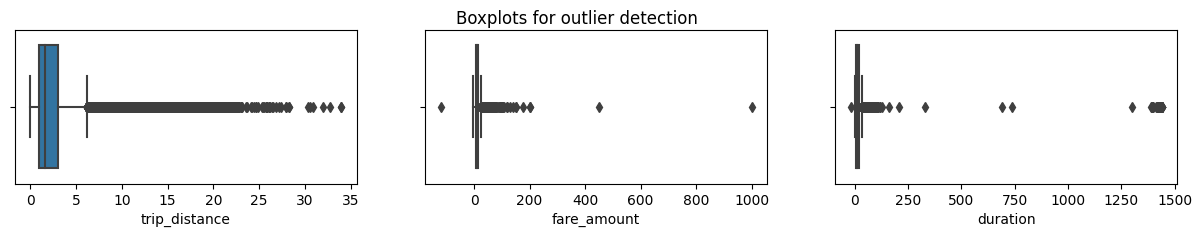

In [32]:
# box plot of trip_distance
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();

**Questions:** 
1. Which variable(s) contains outliers? 
2. Are the values in the `trip_distance` column unbelievable?
3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

**Answers:** 
1. All three variables contain outliers. Some are extreme, but others not so much.
2. The values for `fare_amount` and `duration` definitely seem to have problematic outliers on the higher end.
3. Probably not for the latter two, but for `trip_distance` it might be okay.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [33]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind.

In [34]:
# Calculate the count of rides where the `trip_distance` is zero.
sum(df['trip_distance']==0)

148

`Note` : 148 out of ~23,000 rides is relatively insignificant. we could impute it with a value of 0.01, but it's unlikely to have much of an effect on the model. Therefore, the `trip_distance` column will remain untouched with regard to outliers.

#### `fare_amount` outliers

In [35]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

`Note` : The range of values in the `fare_amount` column is large and the extremes don't make much sense.

In [36]:
# Compute Q3 + 1.5* 9.50
Q3 = 9.50
IQR = 6
upper_limit = Q3 + IQR * 9.50
print('Upper limit for fare_amount:', upper_limit)

Upper limit for fare_amount: 66.5


* **Low values:** Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

* **High values:** The maximum fare amount in this dataset is nearly \$1,000, which seems very unlikely. The interquartile range (IQR) is \$9.50. The standard formula of `Q3 + (1.5 * IQR)` yields \$23.75. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of `6`, which results in a cap of $66.5

By increasing the multiplier, the upper bound of the data is extended to include more potential outliers that fall within this range. This can help to ensure that the analysis is more robust and accurate by including all relevant data points.

In [37]:
# Impute values less than $0 with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

Now we'll impute the maximum value as `Q3 + (6 * IQR)`.

In [39]:
def outlier_imputer(df, column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        df: The dataframe to be processed
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [40]:
outlier_imputer(['fare_amount'], 6)

TypeError: outlier_imputer() missing 1 required positional argument: 'iqr_factor'

#### `duration` outliers


In [41]:
# Call .describe() for duration outliers
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [42]:
# Impute a 0 for any negative values
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()

0.0

In [44]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

TypeError: outlier_imputer() missing 1 required positional argument: 'iqr_factor'

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so we cannot train a model that uses this feature. However, we can use the statistics of trips we *do* know to generalize about ones we do not know.

In this step, we create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

We begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

In [45]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

24870114    100 231
35634249     186 43
Name: pickup_dropoff, dtype: object

Now, we use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [46]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


`grouped` is an object of the `DataFrame` class.

1. We convert it to a dictionary. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information needed.

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key.

In [47]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When we pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary.

In [48]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm functioning
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]

,mean_distance
24870114,3.521667
96629892,3.521667
48945131,3.521667
50574134,3.521667
7282051,3.521667
49385419,3.521667


#### Create `mean_duration` column

We repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [49]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
24870114,22.847222
96629892,22.847222
48945131,22.847222
50574134,22.847222
7282051,22.847222
49385419,22.847222


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [50]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

#### Create `rush_hour` column

We define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [51]:
# Create 'rush_hour' col, define rush hour as 6am-10am and 4pm-8pm
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [52]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [53]:
# Apply the `rush_hourizer()` function to the new column
df['rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

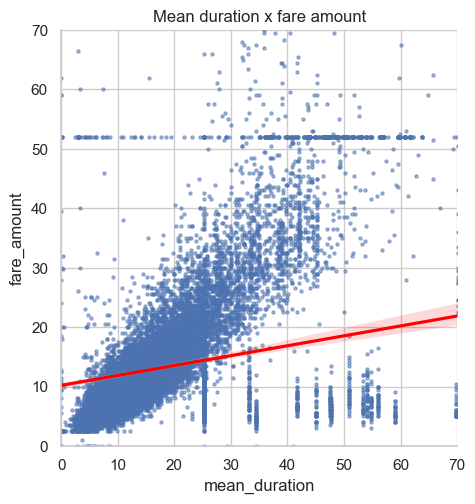

In [57]:
# Create a scatter plot of mean_duration and fare_amount, with a line of best fit
sns.lmplot(x='mean_duration', y='fare_amount', data=df, scatter_kws={'alpha':0.5, 's':5}, line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

We notice the horizontal lines around fare amounts of 52 dollars. It is supposed to represent the maximum that was imputed for outliers.

In [58]:
# Compute the value count of fare_amount above 50
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
59.0      9
50.5      9
57.5      8
51.0      7
Name: count, dtype: int64

`Note` : There are 514 trips whose fares were 52 dollars.

Examine the first 30 of these trips.

In [60]:
# Display the first 30 trips
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,265.147222,sunday,mar,0
47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,61.604762,tuesday,feb,1
55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,61.604762,thursday,aug,0
80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


`Note` : We notice that all of these trips have a fare amount of 52 dollars with a majority that begins or ends at location ID 132, RatecodeID is 2 for all 30 trips.
There is no readily apparent reason for this, they seem to occur at random times of the day, on different days with both vendors.
The data dictionary indicates that RatecodeID 2 is for a "JFK" trip, which stands for John F. Kennedy International Airport. a quick online search shows that the taxi fare from JFK to Manhattan is a flat rate today of $70, but when the data was collected, it was $52 dollars when the data was collected. This is likely the reason for the horizontal line in the scatterplot.

The conclusion of this analysis is that the data is correct and that the model should be trained on the data as-is.

### Task 5. Isolate modeling variables

We drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64       
 

In [66]:
df2 = df.copy()

df2 = df2.drop(['tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

In [84]:
# Create a pairplot in df2 for fare_amount, mean_distance, mean_duration
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

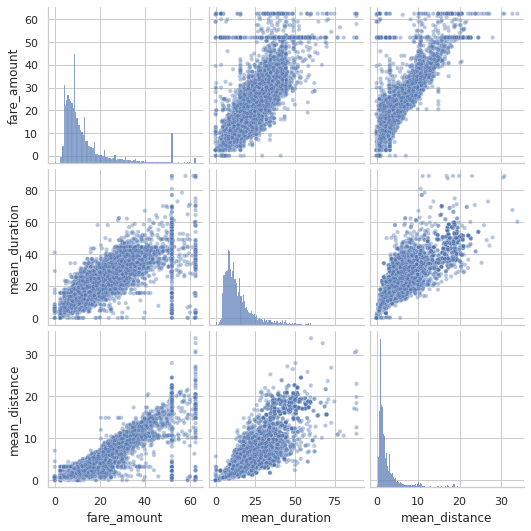

`Note`: These variables all show linear correlation with each other. further investigate required.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [85]:
# Correlation matrix to help determine most correlated variables
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,-0.000113,0.004741,0.005384,-0.002874
passenger_count,0.266463,1.000000,0.010455,0.013428,0.007658,-0.022035
fare_amount,-0.000113,0.010455,1.000000,0.741845,0.304689,-0.016683
mean_distance,0.004741,0.013428,0.741845,1.000000,0.385917,-0.039725
mean_duration,0.005384,0.007658,0.304689,0.385917,1.000000,-0.013415
rush_hour,-0.002874,-0.022035,-0.016683,-0.039725,-0.013415,1.000000


Visualize a correlation heatmap of the data.

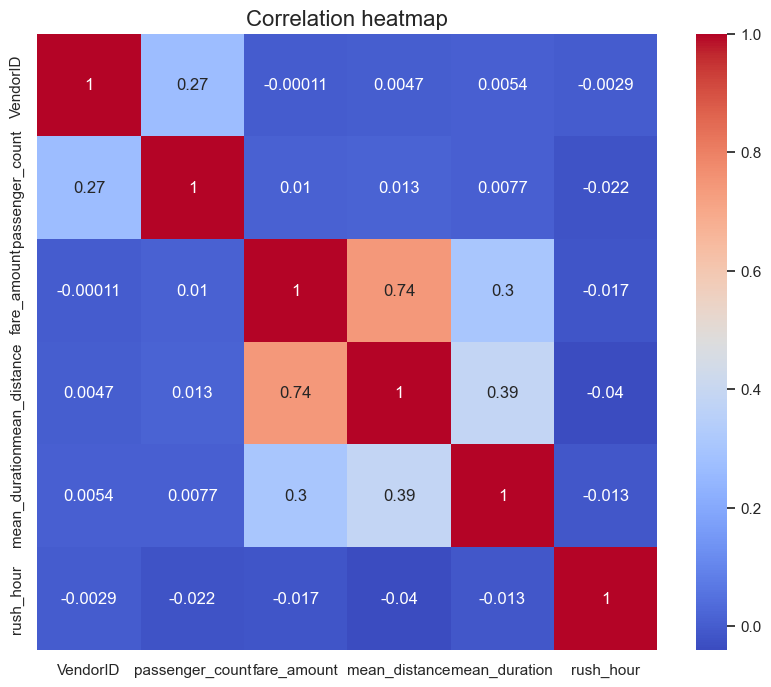

In [86]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap',
          fontsize=16)
plt.show()

mean_distance is highly correlated with the target variable of fare_amount, with a pearson of 0.74.
mean_duration is slightly correlated with the target variable of fare_amount, with a pearson of 0.3.

`Note` : This model will predict fare_amount, which will be used as a predictor variable in machine learning models. therefore, we will use both variables even though they are correlated with each other with a pearson of 0.39.

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.

### Task 8a. Split data into outcome variable and features

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [89]:
# Remove the target column 'fare_amount' from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2['fare_amount']

# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
24870114,2,6,3.521667,22.847222,0
35634249,1,1,3.108889,24.470370,0
106203690,1,1,0.881429,7.250000,1
38942136,2,1,3.700000,30.250000,0
30841670,2,1,4.435000,14.616667,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [90]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
24870114,6,3.521667,22.847222,0,True
35634249,1,3.108889,24.470370,0,False
106203690,1,0.881429,7.250000,1,False
38942136,1,3.700000,30.250000,0,True
30841670,1,4.435000,14.616667,0,True


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [91]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [92]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('X_train_scaled:', X_train_scaled)

X_train_scaled: [[-0.50301524  0.8694684  -0.03115262 -0.64893329  0.89286563]
 [-0.50301524 -0.60011281 -0.39523923  1.54099045  0.89286563]
 [ 0.27331093 -0.47829156 -0.34307963 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.3871602  -0.64893329 -1.11998936]
 [-0.50301524 -0.58944763 -0.46149795  1.54099045 -1.11998936]
 [ 1.82596329  0.83673851  0.36686348 -0.64893329  0.89286563]]


### Fit the model

Instantiate your model and fit it to the training data.

In [93]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

### Task 8c. Evaluate model

### Train data

Let's evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [95]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

coefficient of determination: 0.5079996278862282
R^2: 0.5079996278862282
MAE: 2.6717170977886697
MSE: 92.88372147478809
RMSE: 9.637620114674997


### Test data

Let's calculate the same metrics on the test data.

In [96]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [97]:
# Evaluate the model performance on the testing data
r_sq = lr.score(X_test_scaled, y_test)
print('coefficient of determination:', r_sq)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

coefficient of determination: 0.8261127809154183
R^2: 0.8261127809154183
MAE: 2.5028493495005453
MSE: 20.458845782372048
RMSE: 4.523145562810471


`Note` : The model performance on the test data is better than the training data. This is a good sign that the model is not overfitting.
<br> For the test data, an R^2 of 0.82 means that 82% of the variance in the target variable can be explained by the model.
<br> The mean absolute error is informative because it is the average error. In this case, the average error is 2.5 dollars. This means that the model is off by an average of 2.5 dollars when predicting the fare amount.

## PACE: **Execute**

### Task 9a. Results

Let's compute the `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [98]:
# Create a `results` dataframe to store the actual and predicted values, as well as the residuals
results = pd.DataFrame({'actual': y_test, 'predicted': y_pred_test})
results['residuals'] = abs(results['actual']) - abs(results['predicted'])
results.head()

,actual,predicted,residuals
102188254,14.0,12.711169,1.288831
50574134,28.0,14.592348,13.407652
14767643,5.5,7.269140,-1.769140
16019414,15.5,17.270201,-1.770201
1352127,9.5,10.445021,-0.945021


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

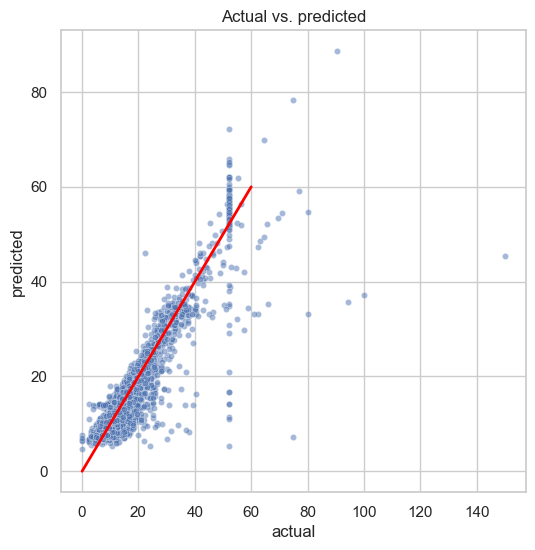

In [101]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Visualize the distribution of the `residuals` using a histogram.

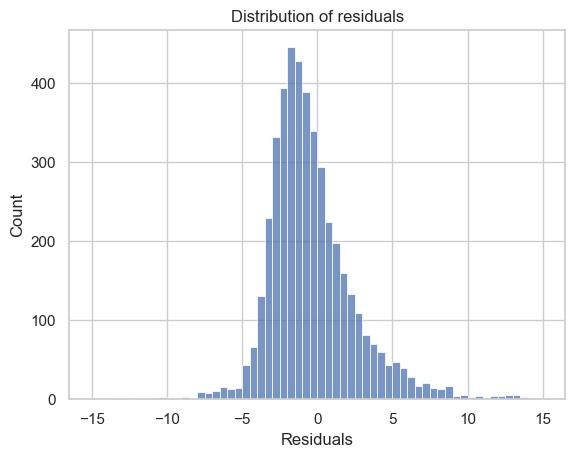

In [106]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residuals'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of residuals');
plt.xlabel('Residuals');
plt.ylabel('Count');

In [108]:
# Calculate residual mean
residual_mean = results['residuals'].mean()
print('Residual mean:', residual_mean)

Residual mean: -0.0825307717809133


Create a scatterplot of `residuals` over `predicted`.

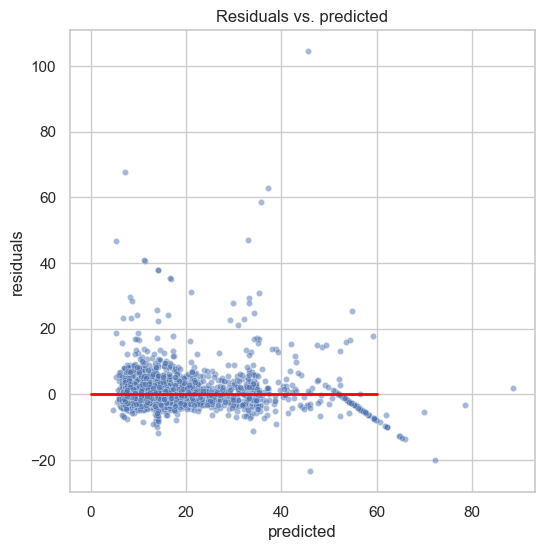

In [109]:
# Create a scatterplot of `residuals` over `predicted`
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='predicted',
                y='residuals',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,0], c='red', linewidth=2)
plt.title('Residuals vs. predicted');

`Note` : The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper left to the lower right. 
<br> Which indicates the imputed maximum fare amount of $52 dollars for JFK Airport trips.

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. 
<br> Then we can determine which feature had the greatest effect on trip fare.

In [110]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
passenger_count,0.014424
mean_distance,9.686934
mean_duration,0.279576
rush_hour,0.151489
VendorID_2,-0.076263


What do these coefficients mean? How should they be interpreted?

`Note`: The coefficients reveal that the mean_distance feature has the greatest effect on the fare_amount.
<br> The data used to train the model was standardized with StandardScaler(). As such, the units are no longer miles, the correct interpretation of this coefficient is: For every +1 change in standard deviation, the fare amount increases by a mean of $9.69.

Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

So, translate this back to miles instead of standard deviation (i.e., unscale the data).

Calculate the standard deviation of mean_distance in the X_train data.

Divide the coefficient (9.686934) by the result to yield a more intuitive interpretation.

In [113]:
# Calculate standard deviation of 'mean_distance`in X_train data
print(X_train['mean_distance'].std())

# Divide the model coefficient by the standard deviation 
print(9.686934 / X_train['mean_distance'].std())

3.574812975256436
2.70977364887323


`Note`: Now we can make a more intuitive interpretation: for every 3.57 miles traveled, the fare increased by a mean of $9.69. Or, reduced: for every 1 mile traveled, the fare increased by a mean of $2.00.

### Task 9d. Conclusion

What results can be presented from this notebook?

`Conclusion` : We can discuss meeting linear regression assumptions, and we can present the MAE and RMSE scores obtained from the model.